In [1]:
import sys
import numpy as np


In [2]:

import pandas as pd

In [3]:
import matplotlib.pyplot as plt


__data collection and cleaning from individual sensors csv files for eastbound direction__

In [4]:
wb063 = pd.read_csv("formatted_raw_data/WB14063.csv")

In [5]:
wb063.head()

,Row Labels,Date,Detector Total Volume,Detector Avg Speed,Detector Avg Occupancy
0,00:00,1-Jul-16,3,97.00,0.50
1,00:01,1-Jul-16,3,95.75,0.53
2,00:02,1-Jul-16,4,108.17,0.43
3,00:03,1-Jul-16,0,NaN,0.00
4,00:04,1-Jul-16,1,98.00,0.10


In [6]:
wb051 = pd.read_csv("formatted_raw_data/WB14051.csv")

In [7]:
wb051.head()

,Row Labels,Date,Detector Total Volume,Detector Avg Speed,Detector Avg Occupancy
0,00:00,1-Jul-16,7,99.08,1.08
1,00:01,1-Jul-16,8,96.13,0.88
2,00:02,1-Jul-16,6,95.83,0.65
3,00:03,1-Jul-16,4,99.33,0.45
4,00:04,1-Jul-16,13,102.00,1.15


In [8]:
wb031 = pd.read_csv("formatted_raw_data/WB14031.csv")
wb031.head()

,Row Labels,Date,Detector Total Volume,Detector Avg Speed,Detector Avg Occupancy
0,00:00,1-Jul-16,9,100.00,0.83
1,00:01,1-Jul-16,18,95.33,1.25
2,00:02,1-Jul-16,9,95.25,0.60
3,00:03,1-Jul-16,21,88.04,1.73
4,00:04,1-Jul-16,15,102.50,1.13


In [9]:
wb003 = pd.read_csv("formatted_raw_data/WB14003.csv")
wb003.head()

,Row Labels,Date,Detector Total Volume,Detector Avg Speed,Detector Avg Occupancy
0,00:00,1-Jul-16,13,91.33,1.34
1,00:01,1-Jul-16,4,79.50,0.62
2,00:02,1-Jul-16,10,92.71,0.84
3,00:03,1-Jul-16,7,87.63,1.28
4,00:04,1-Jul-16,4,89.25,0.28


In [10]:
print(wb063.info())
print(wb051.info())
print(wb031.info())
print(wb003.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125280 entries, 0 to 125279
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Row Labels              125280 non-null  object 
 1   Date                    125280 non-null  object 
 2   Detector Total Volume   125280 non-null  int64  
 3   Detector Avg Speed      125219 non-null  float64
 4   Detector Avg Occupancy  125280 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125280 entries, 0 to 125279
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Row Labels              125280 non-null  object 
 1   Date                    125280 non-null  object 
 2   Detector Total Volume   125280 non-null  int64  
 3   Detector Avg Speed      125267 non-null  float64
 4   Detect

In [11]:
#average occupancy was not used in this study
wb063.drop(axis =1, labels = "Detector Avg Occupancy",inplace = True)
wb051.drop(axis =1, labels = "Detector Avg Occupancy",inplace = True)
wb031.drop(axis =1, labels = "Detector Avg Occupancy",inplace = True)
wb003.drop(axis =1, labels = "Detector Avg Occupancy",inplace = True)

In [13]:
#renaming columns to a convention that makes more sense for a multi-sensor document
wb063.columns = ['Time','Date','063Volume','063Speed']
wb051.columns = ['Time','Date','051Volume','051Speed']
wb031.columns = ['Time','Date','031Volume','031Speed']
wb003.columns = ['Time','Date','003Volume','003Speed']


In [14]:
print(wb063.info())
print(wb051.info())
print(wb031.info())
print(wb003.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125280 entries, 0 to 125279
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       125280 non-null  object 
 1   Date       125280 non-null  object 
 2   063Volume  125280 non-null  int64  
 3   063Speed   125219 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125280 entries, 0 to 125279
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       125280 non-null  object 
 1   Date       125280 non-null  object 
 2   051Volume  125280 non-null  int64  
 3   051Speed   125267 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125280 entries, 0 to 125279
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---

In [15]:
#merging and concatenating data frames together. formatting of time column is inconsistent
#some dataframes have H:MM format, others have HH:MM
#merge when possible, concatenate and trip columns elsewhere


dfwb2 = pd.merge(wb063,wb051)
dfwb2.head()
print(dfwb2.info())
dfwb3 = pd.merge(wb031,wb003)
print(dfwb3.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 125280 entries, 0 to 125279
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       125280 non-null  object 
 1   Date       125280 non-null  object 
 2   063Volume  125280 non-null  int64  
 3   063Speed   125219 non-null  float64
 4   051Volume  125280 non-null  int64  
 5   051Speed   125267 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 6.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125280 entries, 0 to 125279
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       125280 non-null  object 
 1   Date       125280 non-null  object 
 2   031Volume  125280 non-null  int64  
 3   031Speed   125267 non-null  float64
 4   003Volume  125280 non-null  int64  
 5   003Speed   125265 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 6.7

In [16]:
dfwb4 = pd.concat(objs = [dfwb2,dfwb3[['031Volume','031Speed','003Volume','003Speed']]],axis = 1)
print(dfwb4.head())

print(dfwb4.info())

    Time      Date  063Volume  063Speed  051Volume  051Speed  031Volume  \
0  00:00  1-Jul-16          3     97.00          7     99.08          9   
1  00:01  1-Jul-16          3     95.75          8     96.13         18   
2  00:02  1-Jul-16          4    108.17          6     95.83          9   
3  00:03  1-Jul-16          0       NaN          4     99.33         21   
4  00:04  1-Jul-16          1     98.00         13    102.00         15   

   031Speed  003Volume  003Speed  
0    100.00         13     91.33  
1     95.33          4     79.50  
2     95.25         10     92.71  
3     88.04          7     87.63  
4    102.50          4     89.25  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125280 entries, 0 to 125279
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       125280 non-null  object 
 1   Date       125280 non-null  object 
 2   063Volume  125280 non-null  int64  
 3   063Speed   125219 

C:\Users\Brad\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Brad\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


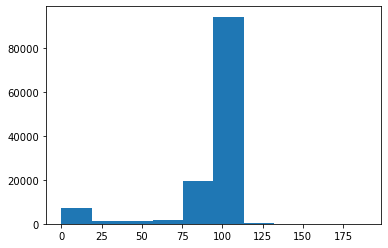

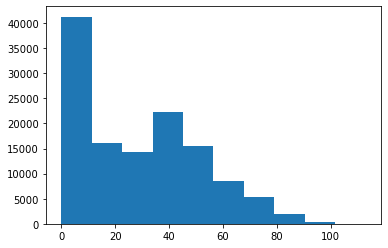

In [17]:

plt.hist(dfwb4['063Speed'])
plt.show()
plt.hist(dfwb4['063Volume'])
plt.show()

In [18]:
dfwb4['063Speed'].replace(0,np.nan,inplace=True)

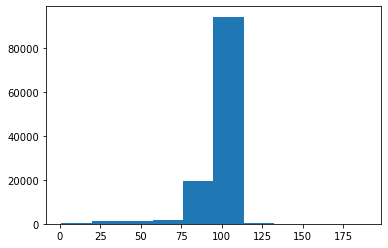

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125280 entries, 0 to 125279
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       125280 non-null  object 
 1   Date       125280 non-null  object 
 2   063Volume  125280 non-null  int64  
 3   063Speed   118395 non-null  float64
 4   051Volume  125280 non-null  int64  
 5   051Speed   125267 non-null  float64
 6   031Volume  125280 non-null  int64  
 7   031Speed   125267 non-null  float64
 8   003Volume  125280 non-null  int64  
 9   003Speed   125265 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 10.5+ MB
None


In [19]:
plt.hist(dfwb4['063Speed'])
plt.show()
print(dfwb4.info())

In [20]:
dfwb4['063Speed'].interpolate( inplace = True,limit = 10, limit_direction='both')

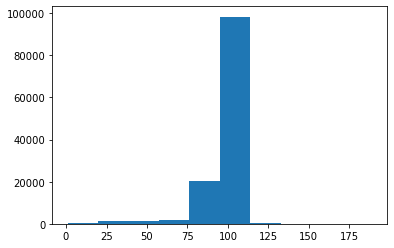

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125280 entries, 0 to 125279
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       125280 non-null  object 
 1   Date       125280 non-null  object 
 2   063Volume  125280 non-null  int64  
 3   063Speed   123667 non-null  float64
 4   051Volume  125280 non-null  int64  
 5   051Speed   125267 non-null  float64
 6   031Volume  125280 non-null  int64  
 7   031Speed   125267 non-null  float64
 8   003Volume  125280 non-null  int64  
 9   003Speed   125265 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 10.5+ MB
None


In [21]:
plt.hist(dfwb4['063Speed'])
plt.show()
print(dfwb4.info())

In [22]:
index_063speed = list(dfwb4.loc[pd.isna(dfwb4['063Speed']),:].index)
print(index_063speed)


[8702, 8703, 8704, 8705, 8706, 8707, 8708, 8709, 8710, 8711, 8712, 8713, 8714, 8715, 8716, 8717, 8718, 8719, 8720, 8721, 8722, 8723, 8724, 8725, 8726, 8727, 8728, 8729, 27262, 27263, 27264, 27265, 27266, 27267, 27268, 27269, 27270, 27271, 27272, 27273, 27274, 27275, 27276, 27277, 27278, 27279, 27280, 27281, 27282, 27283, 27284, 27285, 27286, 27287, 27288, 27289, 27290, 27291, 27292, 27293, 27294, 27295, 27296, 27297, 27298, 27299, 27300, 27301, 27302, 27303, 27304, 27305, 27306, 27307, 27308, 27309, 27310, 27311, 27312, 27313, 27314, 27315, 27316, 27317, 27318, 27319, 27320, 27321, 27322, 27323, 27324, 27325, 27326, 27327, 27328, 27329, 27330, 27331, 27332, 27333, 27334, 27335, 27336, 27337, 27338, 27339, 27340, 27341, 27342, 27343, 27344, 27345, 27346, 27347, 27348, 27349, 27350, 27351, 27352, 27353, 27354, 27355, 27356, 27357, 27358, 27359, 27360, 27361, 27362, 27363, 27364, 27365, 27366, 27367, 27368, 27369, 27370, 27371, 27372, 27373, 27374, 27375, 27376, 27377, 27378, 27379, 27380

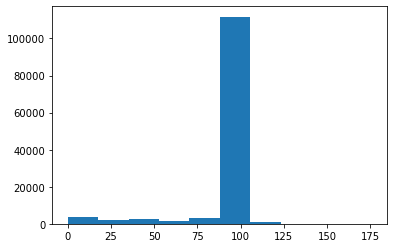

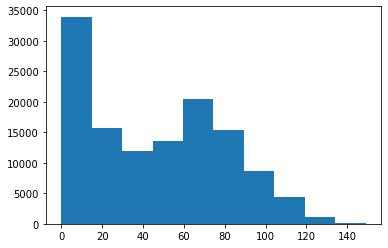

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125280 entries, 0 to 125279
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       125280 non-null  object 
 1   Date       125280 non-null  object 
 2   063Volume  125280 non-null  int64  
 3   063Speed   123667 non-null  float64
 4   051Volume  125280 non-null  int64  
 5   051Speed   121725 non-null  float64
 6   031Volume  125280 non-null  int64  
 7   031Speed   125267 non-null  float64
 8   003Volume  125280 non-null  int64  
 9   003Speed   125265 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 10.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125280 entries, 0 to 125279
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       125280 non-null  object 
 1   Date       125280 non-null  object 
 2   063Volume  125280 non-null  int64  
 3   063Speed

In [23]:
plt.hist(dfwb4['051Speed'])
plt.show()
plt.hist(dfwb4['051Volume'])
plt.show()
dfwb4['051Speed'].replace(0,np.nan,inplace=True)
print(dfwb4.info())
dfwb4['051Speed'].interpolate( inplace = True,limit = 10, limit_direction='both')
print(dfwb4.info())
index_051speed = list(dfwb4.loc[pd.isna(dfwb4['051Speed']),:].index)

print(index_051speed)


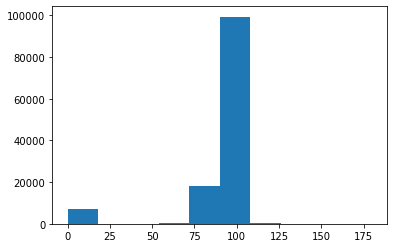

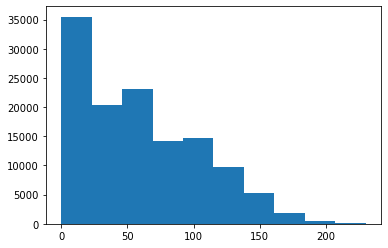

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125280 entries, 0 to 125279
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       125280 non-null  object 
 1   Date       125280 non-null  object 
 2   063Volume  125280 non-null  int64  
 3   063Speed   123667 non-null  float64
 4   051Volume  125280 non-null  int64  
 5   051Speed   123356 non-null  float64
 6   031Volume  125280 non-null  int64  
 7   031Speed   118119 non-null  float64
 8   003Volume  125280 non-null  int64  
 9   003Speed   125265 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 10.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125280 entries, 0 to 125279
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       125280 non-null  object 
 1   Date       125280 non-null  object 
 2   063Volume  125280 non-null  int64  
 3   063Speed

In [24]:
plt.hist(dfwb4['031Speed'])
plt.show()
plt.hist(dfwb4['031Volume'])
plt.show()
dfwb4['031Speed'].replace(0,np.nan,inplace=True)
print(dfwb4.info())
dfwb4['031Speed'].interpolate( inplace = True,limit = 10, limit_direction='both')
print(dfwb4.info())
index_031speed = list(dfwb4.loc[pd.isna(dfwb4['031Speed']),:].index)

print(index_031speed)


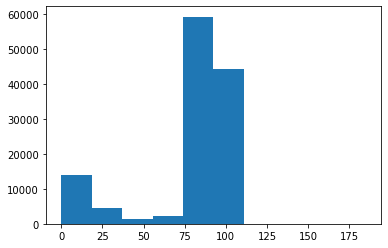

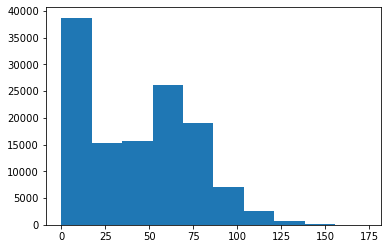

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125280 entries, 0 to 125279
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       125280 non-null  object 
 1   Date       125280 non-null  object 
 2   063Volume  125280 non-null  int64  
 3   063Speed   123667 non-null  float64
 4   051Volume  125280 non-null  int64  
 5   051Speed   123356 non-null  float64
 6   031Volume  125280 non-null  int64  
 7   031Speed   119830 non-null  float64
 8   003Volume  125280 non-null  int64  
 9   003Speed   113197 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 10.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125280 entries, 0 to 125279
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       125280 non-null  object 
 1   Date       125280 non-null  object 
 2   063Volume  125280 non-null  int64  
 3   063Speed

In [25]:
plt.hist(dfwb4['003Speed'])
plt.show()
plt.hist(dfwb4['003Volume'])
plt.show()
dfwb4['003Speed'].replace(0,np.nan,inplace=True)
print(dfwb4.info())
dfwb4['003Speed'].interpolate( inplace = True,limit = 10, limit_direction='both')
print(dfwb4.info())
index_003speed = list(dfwb4.loc[pd.isna(dfwb4['003Speed']),:].index)

print(index_003speed)


In [26]:

index_bad_days = dfwb4[(dfwb4['Date'] == '7-Jul-16')|(dfwb4['Date'] == '20-Jul-16')|(dfwb4['Date'] == '21-Jul-16')|(dfwb4['Date'] == '10-Aug-16')|(dfwb4['Date'] == '13-Aug-16')|(dfwb4['Date'] == '14-Aug-16')|(dfwb4['Date'] == '1-Sep-16')|(dfwb4['Date'] == '7-Sep-16')|(dfwb4['Date'] == '14-Sep-16')|(dfwb4['Date'] == '15-Sep-16')|(dfwb4['Date'] == '22-Sep-16')|(dfwb4['Date'] == '3-Jul-16')|(dfwb4['Date'] == '8-Jul-16')|(dfwb4['Date'] == '11-Aug-16')|(dfwb4['Date'] == '24-Aug-16')|(dfwb4['Date'] == '25-Aug-16')|(dfwb4['Date'] == '27-Sep-16')|(dfwb4['Date'] == '15-Jul-16')|(dfwb4['Date'] == '16-Sep-16')|(dfwb4['Date'] == '17-Sep-16')|(dfwb4['Date'] == '18-Sep-16')|(dfwb4['Date'] == '19-Sep-16')|(dfwb4['Date'] == '20-Sep-16')|(dfwb4['Date'] == '4-Jul-16')|(dfwb4['Date'] == '10-Jul-16')|(dfwb4['Date'] == '16-Jul-16')|(dfwb4['Date'] == '23-Jul-16')|(dfwb4['Date'] == '27-Jul-16')|(dfwb4['Date'] == '28-Jul-16')|(dfwb4['Date'] == '29-Jul-16')|(dfwb4['Date'] == '30-Jul-16')|(dfwb4['Date'] == '31-Jul-16')|(dfwb4['Date'] == '2-Aug-16')|(dfwb4['Date'] == '4-Aug-16')|(dfwb4['Date'] == '7-Aug-16')|(dfwb4['Date'] == '17-Aug-16')|(dfwb4['Date'] == '28-Sep-16')|(dfwb4['Date'] == '5-Jul-16')|(dfwb4['Date'] == '6-Jul-16')|(dfwb4['Date'] == '9-Jul-16')|(dfwb4['Date'] == '10-Jul-16')|(dfwb4['Date'] == '11-Jul-16')].index
dfwb4.drop(index_bad_days,inplace=True)

In [27]:
index_063speed = list(dfwb4.loc[pd.isna(dfwb4['063Speed']),:].index)
print(index_063speed)
index_051speed = list(dfwb4.loc[pd.isna(dfwb4['051Speed']),:].index)
print(index_051speed)
index_031speed = list(dfwb4.loc[pd.isna(dfwb4['031Speed']),:].index)
print(index_031speed)
index_003speed = list(dfwb4.loc[pd.isna(dfwb4['003Speed']),:].index)
print(index_003speed)
print(dfwb4.info())

[]
[]
[]
[]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 66240 entries, 0 to 125279
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       66240 non-null  object 
 1   Date       66240 non-null  object 
 2   063Volume  66240 non-null  int64  
 3   063Speed   66240 non-null  float64
 4   051Volume  66240 non-null  int64  
 5   051Speed   66240 non-null  float64
 6   031Volume  66240 non-null  int64  
 7   031Speed   66240 non-null  float64
 8   003Volume  66240 non-null  int64  
 9   003Speed   66240 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 5.6+ MB
None


In [28]:

dfwb4.reset_index(inplace=True)
dfwb4.drop(['index'],axis=1,inplace=True)


#checking that all NaN values have been removed and index has been restored
print(dfwb4.head())
print(dfwb4.info())
dfwb4.to_csv('clean_data/wbdataset.csv',index=False)

    Time      Date  063Volume  063Speed  051Volume  051Speed  031Volume  \
0  00:00  1-Jul-16          3    97.000          7     99.08          9   
1  00:01  1-Jul-16          3    95.750          8     96.13         18   
2  00:02  1-Jul-16          4   108.170          6     95.83          9   
3  00:03  1-Jul-16          0   103.085          4     99.33         21   
4  00:04  1-Jul-16          1    98.000         13    102.00         15   

   031Speed  003Volume  003Speed  
0    100.00         13     91.33  
1     95.33          4     79.50  
2     95.25         10     92.71  
3     88.04          7     87.63  
4    102.50          4     89.25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66240 entries, 0 to 66239
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       66240 non-null  object 
 1   Date       66240 non-null  object 
 2   063Volume  66240 non-null  int64  
 3   063Speed   66240 non-null

In [ ]:
#saving final dataframe to clean_data folder
dfwb4.to_csv('clean_data/wbdataset.csv',index=False)